## Assignments for Week-03

### 1. Re-code the titanic machine learning

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd
# 读数据
content = pd.read_csv('data/titanic_train.csv')
content = content.dropna()
age_with_fares = content[
    (content['Age'] > 22) & (content['Fare'] < 400) & (content['Fare'] >130)
]
sub_fare = age_with_fares['Fare']
sub_age = age_with_fares['Age']

In [5]:
def func(age, k, b): return k * age + b

In [65]:
import numpy as np
def loss(y, yhat):
    return np.mean(np.abs(y - yhat))
#     return np.mean(np.sqrt(np.abs(y - yhat)))

###### 1. Random Choose Method to get optimal *k* and *b*

loop = 0
f(age) = 7.420491110793488 * age + -3.212554983474412, with error rate: 118.07313693056544
loop = 6
f(age) = 6.787175949573751 * age + 5.793053105126154, with error rate: 106.60492496030515
loop = 7
f(age) = 3.7478368728246263 * age + -5.158271058934655, with error rate: 67.96428492716603
loop = 13
f(age) = 3.9723685735998586 * age + -2.399128641416482, with error rate: 63.415170382015674
loop = 19
f(age) = 4.134154782123627 * age + -1.7974490022193592, with error rate: 62.530673367300096
loop = 26
f(age) = 4.103555277997302 * age + -0.3273278067948677, with error rate: 62.350084974972155
loop = 85
f(age) = 3.656005710010735 * age + 9.50363601294659, with error rate: 62.08113701337409
loop = 102
f(age) = 4.004035557217495 * age + 4.0890114049753805, with error rate: 61.82038041863757
loop = 104
f(age) = 3.9634661603631365 * age + 9.996188796944171, with error rate: 61.02526118936406


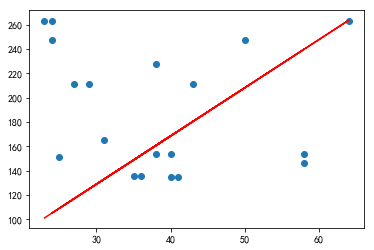

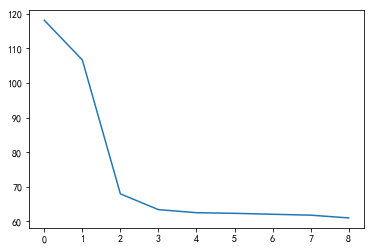

In [46]:
import random
min_error_rate = float('inf')


best_k, best_b = None, None

loop_times = 1000

losses = []

for l in range(loop_times):
    k_hat = random.random() * 20 - 10
    b_hat = random.random() * 20 - 10
    
    estimated_fares = func(sub_age, k_hat, b_hat)
    error_rate = loss(sub_fare, estimated_fares)
    
    if error_rate < min_error_rate:
        losses.append(error_rate)
        min_error_rate = error_rate
        best_k, best_b = k_hat, b_hat
        
        print('loop = {}'.format(l))
        print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, min_error_rate))
        
plt.scatter(sub_age, sub_fare)
plt.plot(sub_age, func(sub_age, best_k, best_b), c='r')

err_decrease = plt.figure()
plt.plot(range(len(losses)), losses)

###### 2.Supervised Direction to get optimal *k* and *b*

loop = 0
f(age) = 6.4710205326818 * age + 8.033269941368776, with error rate: 9.472059189121252
loop = 3
f(age) = 6.136055464506699 * age + 6.747624111987674, with error rate: 9.005767198724607
loop = 4
f(age) = 5.1847772892515795 * age + 6.513392683708714, with error rate: 7.88808835870721
loop = 5
f(age) = 5.116261527708344 * age + 5.5656450207004875, with error rate: 7.759622396007067
loop = 6
f(age) = 4.317472174684661 * age + 4.807709110727494, with error rate: 7.400120477770899
loop = 7
f(age) = 4.13664979711048 * age + 4.4327989003337285, with error rate: 7.223860199535057
loop = 8
f(age) = 3.8292924902787613 * age + 3.707881664418829, with error rate: 7.0310231599142154
loop = 13
f(age) = 3.778806018751722 * age + 3.2889907714489905, with error rate: 6.9622814705605265
loop = 196
f(age) = 4.161264830881408 * age + -4.673016634649834, with error rate: 6.961315517234328
loop = 229
f(age) = 4.1921236184105375 * age + -5.322653292639717, with error rate: 6.9566981373631736


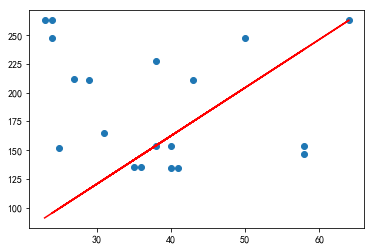

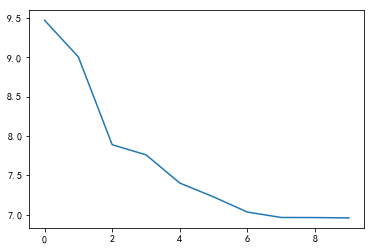

In [57]:
change_directions = [
    (1, -1),
    (1, 1),
    (-1, 1),
    (-1, -1)
]

def step(): return random.random() #* 2 - 1  # [-1, 1]


# best_direction = None
min_error_rate = float('inf')
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10
losses = []

loop_times = 1000

best_direction = random.choice(change_directions)

for l in range(loop_times):
    
    k_delta_direction, b_delta_direction = best_direction
    
    k_delta = k_delta_direction * step()
    b_delta = b_delta_direction * step()
    
    k_hat = k_hat + k_delta
    b_hat = b_hat + b_delta
    
    estimated_fares = func(sub_age, k_hat, b_hat)   
    error_rate = loss(sub_fare, estimated_fares)
    
    if error_rate < min_error_rate:
        
        losses.append(error_rate)
        
        best_direction = (k_delta_direction, b_delta_direction)
        
        min_error_rate = error_rate
        best_k, best_b = k_hat, b_hat
        
        
        print('loop = {}'.format(l))
        print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, min_error_rate))
    
    else:
        best_direction = random.choice(list(set(change_directions) - {(k_delta_direction, b_delta_direction)}))
        
plt.scatter(sub_age, sub_fare)
plt.plot(sub_age, func(sub_age, best_k, best_b), c='r')

err_decrease = plt.figure()
plt.plot(range(len(losses)), losses)
    

###### 3.Gradient Descent to get optimal *k* and *b*

loop = 0
f(age) = -4.565366170796525 * age + -4.446421269510237, with error rate: 368.3758058830199
loop = 1
f(age) = -4.527260907638631 * age + -4.427421269510237, with error rate: 366.90479480268755
loop = 2
f(age) = -4.489155644480737 * age + -4.408421269510237, with error rate: 365.4337837223552
loop = 3
f(age) = -4.451050381322842 * age + -4.389421269510237, with error rate: 363.96277264202274
loop = 4
f(age) = -4.412945118164948 * age + -4.370421269510237, with error rate: 362.49176156169034
loop = 5
f(age) = -4.374839855007053 * age + -4.3514212695102366, with error rate: 361.020750481358
loop = 6
f(age) = -4.336734591849159 * age + -4.332421269510236, with error rate: 359.54973940102553
loop = 7
f(age) = -4.2986293286912645 * age + -4.313421269510236, with error rate: 358.0787283206932
loop = 8
f(age) = -4.26052406553337 * age + -4.294421269510236, with error rate: 356.60771724036067
loop = 9
f(age) = -4.222418802375476 * age + -4.275421269510236, with error rate: 355.136706160

loop = 169
f(age) = 1.8744233028876836 * age + -1.2354212695102247, with error rate: 119.7749333068427
loop = 170
f(age) = 1.9125285660455782 * age + -1.2164212695102248, with error rate: 118.30392222651031
loop = 171
f(age) = 1.9506338292034728 * age + -1.1974212695102249, with error rate: 116.8329111461779
loop = 172
f(age) = 1.9887390923613675 * age + -1.178421269510225, with error rate: 115.3619000658455
loop = 173
f(age) = 2.026844355519262 * age + -1.159421269510225, with error rate: 113.89088898551307
loop = 174
f(age) = 2.064949618677157 * age + -1.1404212695102252, with error rate: 112.41987790518067
loop = 175
f(age) = 2.103054881835052 * age + -1.1214212695102252, with error rate: 110.94886682484824
loop = 176
f(age) = 2.1411601449929467 * age + -1.1024212695102253, with error rate: 109.47785574451582
loop = 177
f(age) = 2.1792654081508416 * age + -1.0834212695102254, with error rate: 108.0068446641834
loop = 178
f(age) = 2.2173706713087364 * age + -1.0644212695102255, with 

loop = 267
f(age) = 3.9760022502561094 * age + -0.015421269510224989, with error rate: 62.76722438525744
loop = 268
f(age) = 3.9816864607824254 * age + -0.010421269510224988, with error rate: 62.733598346476285
loop = 269
f(age) = 3.9873706713087413 * age + -0.0054212695102249875, with error rate: 62.69997230769511
loop = 270
f(age) = 3.9930548818350573 * age + -0.0004212695102249874, with error rate: 62.66634626891395
loop = 271
f(age) = 3.9987390923613733 * age + 0.004578730489775013, with error rate: 62.63272023013281
loop = 272
f(age) = 4.004423302887689 * age + 0.009578730489775013, with error rate: 62.59909419135161
loop = 273
f(age) = 4.010107513414005 * age + 0.014578730489775014, with error rate: 62.56546815257046
loop = 274
f(age) = 4.015791723940321 * age + 0.019578730489775015, with error rate: 62.53184211378929
loop = 275
f(age) = 4.021475934466637 * age + 0.024578730489775016, with error rate: 62.49821607500814
loop = 276
f(age) = 4.027160144992953 * age + 0.0295787304897

f(age) = 4.1025285660455495 * age + 0.43357873048977535, with error rate: 62.2316710365828
loop = 429
f(age) = 4.104212776571865 * age + 0.43657873048977536, with error rate: 62.2395393589689
loop = 430
f(age) = 4.099160144992918 * age + 0.43757873048977536, with error rate: 62.236712587829324
loop = 431
f(age) = 4.100844355519233 * age + 0.44057873048977536, with error rate: 62.23340233852185
loop = 432
f(age) = 4.102528566045549 * age + 0.44357873048977536, with error rate: 62.23066124262543
loop = 433
f(age) = 4.097475934466601 * age + 0.44457873048977536, with error rate: 62.238443889768384
loop = 434
f(age) = 4.099160144992917 * age + 0.44757873048977537, with error rate: 62.2351336404609
loop = 435
f(age) = 4.100844355519232 * age + 0.45057873048977537, with error rate: 62.23182339115344
loop = 436
f(age) = 4.102528566045548 * age + 0.4535787304897754, with error rate: 62.23013492683593
loop = 437
f(age) = 4.0974759344666 * age + 0.4545787304897754, with error rate: 62.2368649423

loop = 538
f(age) = 4.099160144992894 * age + 0.7075787304897756, with error rate: 62.19974711520147
loop = 539
f(age) = 4.094107513413946 * age + 0.7085787304897756, with error rate: 62.20243280943602
loop = 540
f(age) = 4.095791723940262 * age + 0.7115787304897756, with error rate: 62.19912256012855
loop = 541
f(age) = 4.097475934466577 * age + 0.7145787304897756, with error rate: 62.195812310821054
loop = 542
f(age) = 4.099160144992893 * age + 0.7175787304897756, with error rate: 62.19922079941199
loop = 543
f(age) = 4.094107513413945 * age + 0.7185787304897756, with error rate: 62.200853862067596
loop = 544
f(age) = 4.095791723940261 * age + 0.7215787304897756, with error rate: 62.19754361276012
loop = 545
f(age) = 4.097475934466576 * age + 0.7245787304897756, with error rate: 62.194233363452646
loop = 546
f(age) = 4.099160144992892 * age + 0.7275787304897756, with error rate: 62.19869448362253
loop = 547
f(age) = 4.094107513413944 * age + 0.7285787304897756, with error rate: 62.19

loop = 668
f(age) = 4.08905488183497 * age + 1.0295787304897746, with error rate: 62.16025829420061
loop = 669
f(age) = 4.090739092361286 * age + 1.0325787304897744, with error rate: 62.156948044893134
loop = 670
f(age) = 4.092423302887601 * age + 1.0355787304897743, with error rate: 62.15363779558566
loop = 671
f(age) = 4.094107513413917 * age + 1.0385787304897742, with error rate: 62.156796976697166
loop = 672
f(age) = 4.0890548818349695 * age + 1.0395787304897741, with error rate: 62.158679346832194
loop = 673
f(age) = 4.090739092361285 * age + 1.042578730489774, with error rate: 62.155369097524705
loop = 674
f(age) = 4.0924233028876005 * age + 1.045578730489774, with error rate: 62.15205884821724
loop = 675
f(age) = 4.094107513413916 * age + 1.0485787304897738, with error rate: 62.156270660907694
loop = 676
f(age) = 4.089054881834969 * age + 1.0495787304897737, with error rate: 62.15710039946377
loop = 677
f(age) = 4.090739092361284 * age + 1.0525787304897736, with error rate: 62.1

loop = 806
f(age) = 4.085686460782308 * age + 1.3735787304897595, with error rate: 62.1116156349209
loop = 807
f(age) = 4.087370671308624 * age + 1.3765787304897594, with error rate: 62.10830538561341
loop = 808
f(age) = 4.089054881834939 * age + 1.3795787304897593, with error rate: 62.1133205224034
loop = 809
f(age) = 4.084002250255992 * age + 1.3805787304897592, with error rate: 62.11334693685995
loop = 810
f(age) = 4.085686460782307 * age + 1.383578730489759, with error rate: 62.11003668755246
loop = 811
f(age) = 4.087370671308623 * age + 1.386578730489759, with error rate: 62.10672643824499
loop = 812
f(age) = 4.089054881834938 * age + 1.3895787304897589, with error rate: 62.11279420661391
loop = 813
f(age) = 4.084002250255991 * age + 1.3905787304897588, with error rate: 62.111767989491526
loop = 814
f(age) = 4.0856864607823065 * age + 1.3935787304897587, with error rate: 62.108457740184036
loop = 815
f(age) = 4.087370671308622 * age + 1.3965787304897586, with error rate: 62.105147

loop = 911
f(age) = 4.080633829203338 * age + 1.634578730489748, with error rate: 62.078914803896
loop = 912
f(age) = 4.082318039729653 * age + 1.637578730489748, with error rate: 62.075604554588516
loop = 913
f(age) = 4.084002250255969 * age + 1.640578730489748, with error rate: 62.07405459442542
loop = 914
f(age) = 4.078949618677021 * age + 1.6415787304897478, with error rate: 62.08064610583506
loop = 915
f(age) = 4.080633829203337 * age + 1.6445787304897477, with error rate: 62.07733585652757
loop = 916
f(age) = 4.082318039729652 * age + 1.6475787304897476, with error rate: 62.07402560722011
loop = 917
f(age) = 4.084002250255968 * age + 1.6505787304897475, with error rate: 62.07352827863597
loop = 918
f(age) = 4.07894961867702 * age + 1.6515787304897473, with error rate: 62.07906715846665
loop = 919
f(age) = 4.080633829203336 * age + 1.6545787304897472, with error rate: 62.075756909159175
loop = 920
f(age) = 4.0823180397296515 * age + 1.6575787304897471, with error rate: 62.07244665

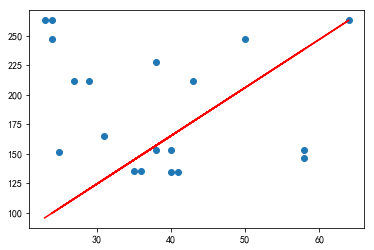

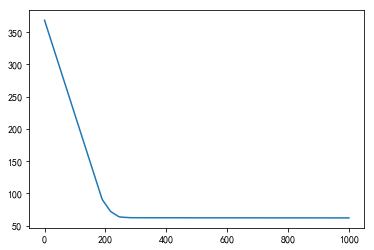

In [66]:
def derivate_k(y, yhat, x):
    abs_value = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    
    return np.mean([a * - x_i for a, x_i in zip(abs_value, x)])

def derivate_b(y, yhat):
    abs_value = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    
    return np.sum([a * - 1 for a in abs_value])


change_directions = [
    (1, -1),
    (1, 1),
    (-1, 1),
    (-1, -1)
]

def step(): return random.random() #* 2 - 1  # [-1, 1]


# best_direction = None
min_error_rate = float('inf')
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10
losses = []

loop_times = 1000

best_direction = random.choice(change_directions)

learning_rate = 1e-3

for l in range(loop_times):
    
#     k_delta_direction, b_delta_direction = best_direction
    
    k_delta = - learning_rate * derivate_k(sub_fare, func(sub_age, k_hat, b_hat), sub_age) 
    b_delta = - learning_rate * derivate_b(sub_fare, func(sub_age, k_hat, b_hat)) 
    
    k_hat = k_hat + k_delta
    b_hat = b_hat + b_delta
    
    estimated_fares = func(sub_age, k_hat, b_hat)   
    error_rate = loss(sub_fare, estimated_fares)
    
#     if error_rate < min_error_rate:
        
    losses.append(error_rate)
        
#         best_direction = (k_delta_direction, b_delta_direction)
        
    min_error_rate = error_rate
    best_k, best_b = k_hat, b_hat
        
        
    print('loop = {}'.format(l))
    print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, min_error_rate))
    
#     else:
#         best_direction = random.choice(list(set(change_directions) - {(k_delta_direction, b_delta_direction)}))
        
plt.scatter(sub_age, sub_fare)
plt.plot(sub_age, func(sub_age, best_k, best_b), c='r')

err_decrease = plt.figure()
plt.plot(range(len(losses)), losses)
    

## 2. Answer following questions:


###### 1. Why we need machine learning methods instead of creating a complicated formula?


Ans: 降低开发的难度和工作量，且有些问题靠分析是解决不了的，而机器学习提供了一种从数据角度的解决办法（比较黑盒）。

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: 当样本的维度比较高的时候，参数的搜索范围会很大，靠随机选择就很难达到最优的结果了。

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: 理论上来说应该是好于第一个的，因为通过对方向的限制，缩小了参数的搜索范围。缺点是随机的步长可能会导致损失函数值一直在最优点两侧来回振荡；另外可选择的方向的个数是$2^n$（n是维度），维度高的时候，也很难随机到正确的方向（目前的方法只能排除一个错误方向，如果可选方向有1000多，那几乎和不排除没什么区别）。

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: 因为函数（损失函数）的梯度方向是函数值变化速度最快的方向。

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans: Gredient 是梯度，指参数变化的幅度与损失函数的梯度成正比，Descent 指的是参数变化的方向等于与梯度相反的方向（函数值减小的方向）。

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans: 迭代次数更少，且在损失函数是凸函数的情况下，可以保证求到最优解。

###### 7. Using the simple words to describe: What's the machine leanring.

Ans: 从一个数据集，得到某个预先定义的模型的参数。

### 3. Search problem

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因
